# Calendar Spread

To implement this [strategy](https://www.investopedia.com/terms/c/calendarspread.asp), the trader sells a short-term option (either a call or a put) and buys a long-term option of same type, both options with the same strike. As such, it is a debit spread, the maximum loss being the amount paid for the strategy.

**Caveat: Options are very risky derivatives and, like any other type of financial vehicle, trading options requires due diligence. Transactions shown as examples of trading strategies with options in this notebook are not recommendations.**

In [1]:
from __future__ import print_function
import sys
import optionlab as op
%matplotlib inline

In [2]:
print("Python version: %s" % sys.version)
print("OptionLab version: %s" % op.__version__)

Python version: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
OptionLab version: 0.1.5


After importing *OptionLab*, a *Strategy* object must be created.

In [3]:
st=op.strategy.Strategy()

The underlying asset is Apple stock (ticker: APPL). We consider the stock price on January 18, 2021. The strategy involves selling 1000 calls with a strike of 127, expiring on January 29, 2021, and buying 1000 calls with a strike of 127, expiring on February 12, 2021. The first leg of the strategy earns us a premium of 4.60 per option, while the second leg costs us 5.90 per option.

In [4]:
stockprice=127.14
volatility=0.427
startdate="2021-01-18"
targetdate="2021-01-29"
interestrate=0.0009
minstock=stockprice-round(stockprice*0.5,2)
maxstock=stockprice+round(stockprice*0.5,2)
strategy=[{"type":"call","strike":127.00,"premium":4.60,"n":1000,"action":"sell"},
          {"type":"call","strike":127.00,"premium":5.90,"n":1000,"action":"buy","expiration":"2021-02-12"}]

st.getdata(stockprice=stockprice,startdate=startdate,targetdate=targetdate,volatility=volatility,interestrate=interestrate,
           minstock=minstock,maxstock=maxstock,strategy=strategy)

In [5]:
%%time
out=st.run()

Wall time: 12.2 ms


Profit/loss profile is displayed by calling the *plotPL()* method.

P/L profile diagram:
--------------------
The vertical green dashed line corresponds to the position of the stock's spot price. The right and left arrow markers indicate the strike prices of calls and puts, respectively, with blue representing long and red representing short positions.


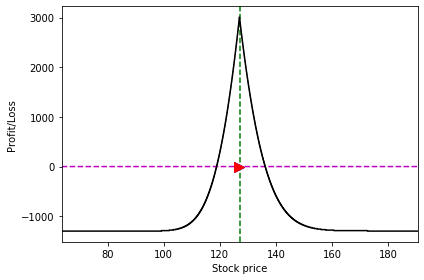

In [6]:
st.plotPL()

Below one can see some useful results of the calculations made for the strategy, including its PoP.

In [7]:
print("Days remaining to the target date: %d" % st.days2target)
print("Strategy cost: %.2f" % out["StrategyCost"])
print("Maximum loss: %.2f" % abs(out["MinimumReturnInTheDomain"]))
print("Maximum profit: %.2f" % out["MaximumReturnInTheDomain"])

print("Profitable stock price range:")

for profrange in out["ProfitRanges"]:
    print("      %.2f ---> %.2f" % (profrange[0],profrange[1]))

print("Probability of Profit (PoP): %.1f%%" % (out["ProbabilityOfProfit"]*100.0))

Days remaining to the target date: 8
Strategy cost: -1300.00
Maximum loss: 1300.00
Maximum profit: 3010.00
Profitable stock price range:
      118.87 ---> 136.15
Probability of Profit (PoP): 62.7%
